In [1]:
import numpy as np
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import geone
import geone.covModel as gcm
import geone.imgplot3d as imgplt3
import pyvista as pv
import sys
import os

sys.path.append("../../../")
#my modules
from ArchPy.base import *
from ArchPy.tpgs import *

In [2]:
pv.set_jupyter_backend("static")

In [3]:
#grid
sx = 1.5
sy = 1.5
sz = .15
x0 = 0
y0 = 0
z0 = -15
nx = 140
ny = 70
nz = 70
x1 = x0 + nx*sx
y1 = y0 + ny*sy
z1 = z0 + nz

dimensions = (nx, ny, nz)
spacing = (sx, sy, sz)
origin = (x0, y0, z0)  

domain = np.ones([ny,nx],dtype=bool)

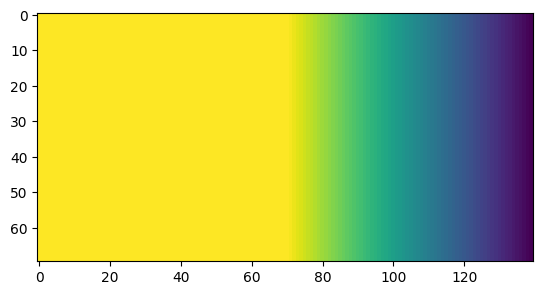

In [4]:
mean_A = np.ones([ny, nx])*-11
mean_A[:, 70:] = np.linspace(-11, -13, 70)
plt.imshow(mean_A)

In [5]:
## create pile

P1 = Pile(name = "P1",seed=1)
PD = Pile(name = "PD",seed=1)

#units covmodel
covmodelD = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[30,30]})])
covmodelD1 = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[30,30]})])
covmodelC = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[40,40]})])
covmodelB = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[60, 60]})])
covmodelA = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[60, 100]})])
covmodel_er = gcm.CovModel2D(elem=[('spherical', {'w':1, 'r':[50,50]})])

## facies covmodel
covmodel_SIS_C = gcm.CovModel3D(elem=[("exponential", {"w":.21,"r":[50, 50, 10]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B1 = gcm.CovModel3D(elem=[("exponential", {"w":.16,"r":[50, 50, 2]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B2 = gcm.CovModel3D(elem=[("exponential", {"w":.24,"r":[100, 100, 3]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B3 = gcm.CovModel3D(elem=[("exponential", {"w":.19,"r":[50, 50, 2]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B4 = gcm.CovModel3D(elem=[("exponential", {"w":.13,"r":[100, 100, 4]})], alpha=0, name="vario_SIS") # input variogram

lst_covmodelC=[covmodel_SIS_C] # list of covmodels to pass at the function
lst_covmodelB=[covmodel_SIS_B1, covmodel_SIS_B2, covmodel_SIS_B3, covmodel_SIS_B4] # list of covmodels to pass


#create Lithologies 
dic_s_D2 = {"int_method" : "grf_ineq","covmodel" : covmodelD1}
dic_f_D2 = {"f_method":"homogenous"}
D2 = Unit(name="D2",order=1,ID = 10,color="goldenrod",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D2),
          dic_facies=dic_f_D2)
dic_s_D1 = {"int_method" : "grf_ineq","covmodel" : covmodelD1, "mean":-6.5}
dic_f_D1 = {"f_method":"homogenous"}
D1 = Unit(name="D1",order=2,ID = 11,color="palegoldenrod",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D1)
            ,dic_facies=dic_f_D1)


PD.add_unit([D1,D2])

dic_s_D = {"int_method" : "grf_ineq","covmodel" : covmodelD}
dic_f_D = {"f_method":"SubPile", "SubPile":PD}
D = Unit(name="D",order=1,ID = 1,color="gold",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D)
         ,dic_facies=dic_f_D)

dic_s_C = {"int_method" : "grf_ineq","covmodel" : covmodelC, "mean":-7}
dic_f_C = {"f_method" : "SIS","neig" : 10, "f_covmodel":lst_covmodelC, "probability":[0.3, 0.7]}
C = Unit(name="C", order=2, ID = 2, color="blue", contact="onlap", dic_facies=dic_f_C, surface=Surface(dic_surf=dic_s_C, contact="onlap"))

dic_s_B = {"int_method" : "grf_ineq","covmodel" : covmodelB, "mean":-8.5}
dic_f_B = {"f_method":"SIS", "neig" : 10, "f_covmodel":lst_covmodelB, "probability":[0.2, 0.4, 0.25, 0.15]}
B = Unit(name="B",order=3,ID = 3,color="purple",contact="onlap",dic_facies=dic_f_B,surface=Surface(contact="onlap",dic_surf=dic_s_B))

dic_s_A = {"int_method":"grf_ineq","covmodel": covmodelA, "mean":mean_A}
dic_f_A = {"f_method":"homogenous"}
A = Unit(name="A",order=5,ID = 5,color="red",contact="onlap",dic_facies=dic_f_A,surface=Surface(dic_surf = dic_s_A,contact="onlap"))

#Master pile
P1.add_unit([D,C,B,A])

Unit D2: Surface added for interpolation
Unit D1: Surface added for interpolation
Stratigraphic unit D1 added ✅
Stratigraphic unit D2 added ✅
Unit D: Surface added for interpolation
Unit C: Surface added for interpolation
Unit B: Surface added for interpolation
Unit A: Surface added for interpolation
Stratigraphic unit D added ✅
Stratigraphic unit C added ✅
Stratigraphic unit B added ✅
Stratigraphic unit A added ✅


In [6]:
# covmodels for the property model
covmodelK = gcm.CovModel3D(elem=[("exponential",{"w":0.3,"r":[30,30,10]})],alpha=-20,name="K_vario")
covmodelK2 = gcm.CovModel3D(elem=[("spherical",{"w":0.1,"r":[20,20, 5]})],alpha=0,name="K_vario_2")

facies_1 = Facies(ID = 1,name="Sand",color="yellow")
facies_2 = Facies(ID = 2,name="Gravel",color="lightgreen")
facies_3 = Facies(ID = 3,name="GM",color="blueviolet")
facies_4 = Facies(ID = 4,name="Clay",color="blue")
facies_5 = Facies(ID = 5,name="SM",color="brown")
facies_6 = Facies(ID = 6,name="Silt",color="goldenrod")
facies_7 = Facies(ID = 7,name="basement",color="red")

A.add_facies([facies_7])
B.add_facies([facies_1, facies_2, facies_3, facies_5])
D.add_facies([facies_1, facies_5])
D1.add_facies([facies_1])
D2.add_facies([facies_5])
C.add_facies([facies_4, facies_6])

# property model
cm_prop1 = gcm.CovModel3D(elem = [("spherical", {"w":0.1, "r":[10,10,10]}),
                                  ("cubic", {"w":0.1, "r":[15,15,15]})])
cm_prop2 = gcm.CovModel3D(elem = [("cubic", {"w":0.2, "r":[25, 25, 5]})])

list_facies = [facies_1, facies_2, facies_3, facies_4, facies_5, facies_6, facies_7]
list_covmodels = [cm_prop2, cm_prop1, cm_prop2, cm_prop1, cm_prop2, cm_prop1, cm_prop2]
means = [-4, -2, -6, -9, -6, -7, -19]
prop_model = ArchPy.base.Prop("K",
                              facies = list_facies,
                              covmodels = list_covmodels,
                                means = means,
                                int_method = "sgs",
                                vmin = -10,
                                vmax = -1
                                )



Facies basement added to unit A ✅
Facies Sand added to unit B ✅
Facies Gravel added to unit B ✅
Facies GM added to unit B ✅
Facies SM added to unit B ✅
Facies Sand added to unit D ✅
Facies SM added to unit D ✅
Facies Sand added to unit D1 ✅
Facies SM added to unit D2 ✅
Facies Clay added to unit C ✅
Facies Silt added to unit C ✅


In [7]:
top = np.ones([ny,nx])*-6
bot = np.ones([ny,nx])*z0

In [8]:
T1 = Arch_table(name = "P1",seed=3)
T1.set_Pile_master(P1)
T1.add_grid(dimensions, spacing, origin, top=top,bot=bot, polygon=domain)
T1.add_prop(prop_model)

Pile sets as Pile master
## Adding Grid ##
## Grid added and is now simulation grid ##
Property K added


In [9]:
T1.process_bhs(reprocess=True)

Hard data reset
##### ORDERING UNITS ##### 
Pile P1: ordering units
Stratigraphic units have been sorted according to order
Discrepency in the orders for units A and B
Changing orders for that they range from 1 to n
Pile PD: ordering units
Stratigraphic units have been sorted according to order
hierarchical relations set
No borehole found - no hd extracted


In [10]:
import flopy as fp
import ArchPy.ap_mf
from ArchPy.ap_mf import archpy2modflow, array2cellids

In [11]:
# archpy_flow = archpy2modflow(T1, exe_name="../../../../../exe/mf6.exe", model_dir="reference")  # create the modflow model
# archpy_flow.create_sim(grid_mode="layers", iu=0)  # create the simulation object and choose a certain discretization
# archpy_flow.set_k("K", iu=0, ifa=0, ip=0, log=True, k_average_method="anisotropic")  # set the hydraulic conductivity

In [12]:
# sim = archpy_flow.get_sim()
# gwf = archpy_flow.get_gwf()

#### BC

In [13]:
# # add BC at left and right on all layers
# h1 = 1
# h2 = 0
# chd_data = []

# a = np.zeros((gwf.modelgrid.nlay, gwf.modelgrid.nrow, gwf.modelgrid.ncol), dtype=bool)
# a[:, :, 0] = 1
# lst_chd = array2cellids(a, gwf.dis.idomain.array)
# for cellid in lst_chd:
#     chd_data.append((cellid, h1))

# a = np.zeros((gwf.modelgrid.nlay, gwf.modelgrid.nrow, gwf.modelgrid.ncol), dtype=bool)
# a[:, :, -1] = 1
# lst_chd = array2cellids(a, gwf.dis.idomain.array)
# for cellid in lst_chd:
#     chd_data.append((cellid, h2))

# chd = fp.mf6.ModflowGwfchd(gwf, stress_period_data=chd_data, save_flows=True)

#### Observations for inverse

In [14]:
# lst_obs = [("h1","HEAD", (3, 13, 25)), ("h2", "HEAD", (3, 25, 50)), ("h3", "HEAD", (3, 45, 70)),
#            ("h4","HEAD", (3, 33, 110)), ("h5","HEAD", (3, 63, 130)), ("h6","HEAD", (3, 23, 130)),
#            ("h7","HEAD", (3, 33, 100)), ("h8","HEAD", (3, 13, 121)), ("h9","HEAD", (3, 53, 20)),
#            ("h10","HEAD", (3, 35, 88))]

In [15]:
# obs_recarray = {
#     "head_obs_ref.csv":lst_obs
# }
# obs_package = fp.mf6.ModflowUtlobs(
#     gwf,
#     pname="head_obs",
#     filename="{}.obs".format(gwf.name),
#     digits=5,
#     print_input=True,
#     continuous=obs_recarray,
# )

In [16]:
# grid = gwf.modelgrid
# plt.scatter(
#     [grid.xcellcenters[cell[2][1], cell[2][2]] for cell in obs_recarray["head_obs_ref.csv"]],
#     [grid.ycellcenters[cell[2][1], cell[2][2]] for cell in obs_recarray["head_obs_ref.csv"]],
#     marker="o",
#     color="red",
#     label="Observation points",
# )
# gwf.modelgrid.plot(alpha=.3)

In [17]:
# sim.ims.remove()
# ims = fp.mf6.ModflowIms(sim, complexity="moderate")

In [18]:
# sim.write_simulation()

In [19]:
# sim.run_simulation()

In [20]:
# from flopy.export.vtk import Vtk

# vert_exag = 3
# vtk = Vtk(model=gwf, binary=False, vertical_exageration=vert_exag, smooth=True)
# vtk.add_model(gwf)

# head = gwf.output.head().get_data()
# vtk.add_array(head, name="head")
# gwf_mesh = vtk.to_pyvista()

# ghosts = np.argwhere(gwf_mesh["idomain"] == 0)
# gwf_mesh.remove_cells(ghosts, inplace=True)
# ghosts = np.argwhere(gwf_mesh["head"] > 1)
# gwf_mesh.remove_cells(ghosts, inplace=True)

# pl = pv.Plotter(notebook=True)
# pl.add_mesh(gwf_mesh, opacity=1, show_edges=True, scalars="head", cmap="viridis", clim=[0, 1], edge_opacity=0.3)
# pl.show()

In [21]:
# np.savetxt("reference/surf_C.txt", T1.get_surfaces_unit(T1.get_unit("C"))[1])

Change ArchPy model to be homogeneous and more general 

In [22]:
# set mean of A surface 
T1.get_unit("A").surface.dic_surf["mean"] = -11
T1.get_unit("A").surface.covmodel.elem = [('cubic', {'w': 1, 'r': [60, 100]})]

# set f_method
for unit in T1.get_all_units():
    if unit.f_method == "SIS":
        d_fa = unit.dic_facies
        d_fa["f_method"] = "homogenous"
        unit.set_dic_facies(d_fa)
    
    # remove facies
    while len(unit.list_facies) > 0:
        unit.list_facies.pop()

# create a facies for each unit
facies_D2 = Facies(ID = 1, name="D2", color="yellow")
facies_D1 = Facies(ID = 2, name="D1", color="brown")
facies_C = Facies(ID = 3, name="C", color="blue")
facies_B = Facies(ID = 4, name="B", color="green")
facies_A = Facies(ID = 5, name="A", color="red")

D2.add_facies([facies_D2])
D1.add_facies([facies_D1])
C.add_facies([facies_C])
B.add_facies([facies_B])
A.add_facies([facies_A])

# set k values for each layer (new property)
# T1.rem_prop("K")  # remove the previous property model
# list_facies = [facies_D2, facies_D1, facies_C, facies_B, facies_A]
# means = [(-7, -4), (-4, -2), (-8, -5), (-4, -1), (-10, -10)]
# prop_model = ArchPy.base.Prop("K",
#                               facies = list_facies,
#                               covmodels = None,
#                                 means = means,
#                                 int_method = "homogenous_uniform",
#                                 vmin = -10,
#                                 vmax = -1
#                                 )
T1.rem_prop("K")  # remove the previous property model
list_facies = [facies_D2, facies_D1, facies_C, facies_B, facies_A]
means = [-6, -4, -7.25, -3.9, -10]
prop_model = ArchPy.base.Prop("K",
                              facies = list_facies,
                              covmodels = None,
                                means = means,
                                int_method = "homogenous",
                                vmin = -10,
                                vmax = -1
                                )
T1.add_prop(prop_model)

Facies D2 added to unit D2 ✅
Facies D1 added to unit D1 ✅
Facies C added to unit C ✅
Facies B added to unit B ✅
Facies A added to unit A ✅
Property K removed
Property K added


In [23]:
T1.seed = int(4e6)  # change seed

In [24]:
T1.erase_hd()

Hard data reset


In [28]:
n_members = 150

In [ ]:
T1.process_bhs()
T1.compute_surf(n_members)
# T1.compute_facies()
# T1.compute_prop()

##### ORDERING UNITS ##### 
Pile P1: ordering units
Stratigraphic units have been sorted according to order
Pile PD: ordering units
Stratigraphic units have been sorted according to order
hierarchical relations set
No borehole found - no hd extracted
Boreholes not processed, fully unconditional simulations will be tempted
########## PILE P1 ##########
Pile P1: ordering units
Stratigraphic units have been sorted according to order

#### COMPUTING SURFACE OF UNIT A
A: time elapsed for computing surface 0.03803372383117676 s

#### COMPUTING SURFACE OF UNIT B
B: time elapsed for computing surface 0.03102874755859375 s

#### COMPUTING SURFACE OF UNIT C
C: time elapsed for computing surface 0.030027389526367188 s

#### COMPUTING SURFACE OF UNIT D
D: time elapsed for computing surface 0.0 s

Time elapsed for getting domains 0.054049015045166016 s

#### COMPUTING SURFACE OF UNIT A
A: time elapsed for computing surface 0.03202939033508301 s

#### COMPUTING SURFACE OF UNIT B
B: time elapsed for 

In [30]:
n_members

150

In [29]:
# save mean surfaces and all surfaces in reference folder
for unit in [D1, C, B, A]:
    np.savetxt(f"reference/mean_{unit.name}.txt", np.flipud(T1.get_surfaces_unit(unit).mean(0)))
    np.save(f"reference/reals_{unit.name}.npy", np.flip(T1.get_surfaces_unit(unit), axis=1).reshape(n_members, -1))

In [72]:
np.flip(T1.get_surfaces_unit(C), axis=1).reshape(50, -1).mean(0)

array([-7.0028424, -7.0004897, -6.994012 , ..., -6.985772 , -6.984693 ,
       -6.9826384], dtype=float32)

In [55]:
T1.get_surfaces_unit(unit).shape

(50, 70, 140)

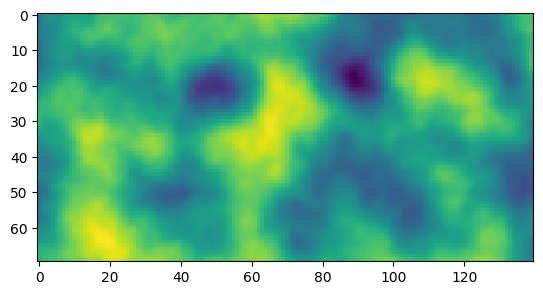

In [47]:
plt.imshow(T1.get_surfaces_unit(C).mean(0))

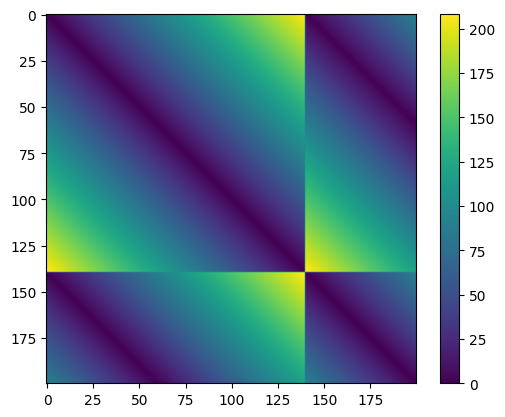

In [45]:

from scipy.spatial.distance import pdist, squareform
x, y = T1.xu2D.T

dist = pdist(T1.xu2D)
dist = squareform(dist)
plt.imshow(dist[0:200,0:200])
plt.colorbar()

In [48]:
T1.xu2D

array([[  0.75,   0.75],
       [  2.25,   0.75],
       [  3.75,   0.75],
       ...,
       [206.25, 104.25],
       [207.75, 104.25],
       [209.25, 104.25]], dtype=float32)

Re-run a modflow model to create base model for inversion

...